In [1]:
%pylab inline

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

import pandas as pd
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

import matplotlib
matplotlib.rc('font', family='Verdana')
from matplotlib import pyplot

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('../../data/video_games_sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.2+ MB


In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [5]:
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

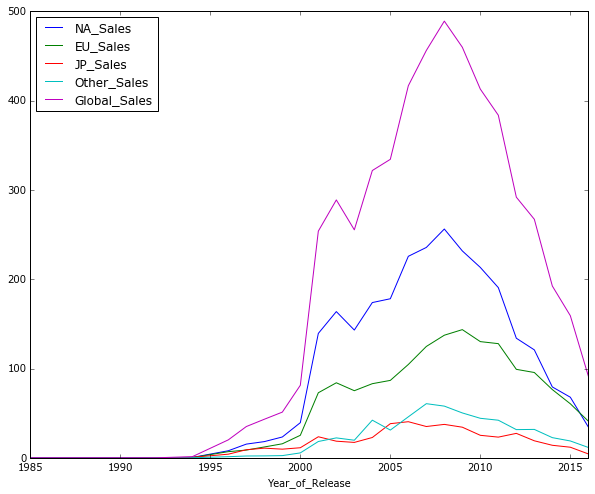

In [6]:
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
sales_df.groupby('Year_of_Release').sum().plot()

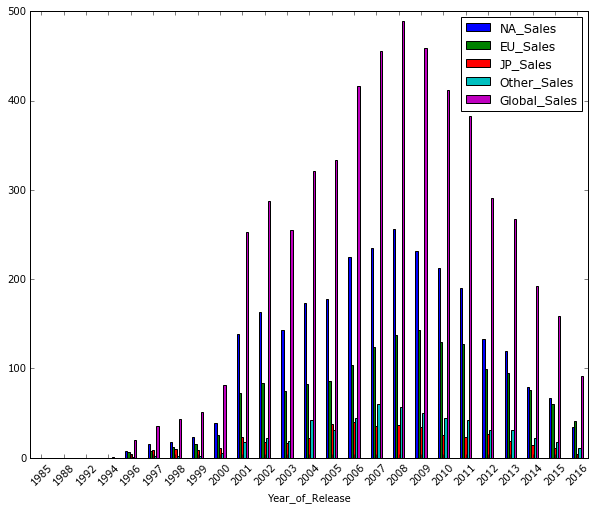

In [7]:
sales_df.groupby('Year_of_Release').sum().astype('int').plot(kind='bar',rot=45)

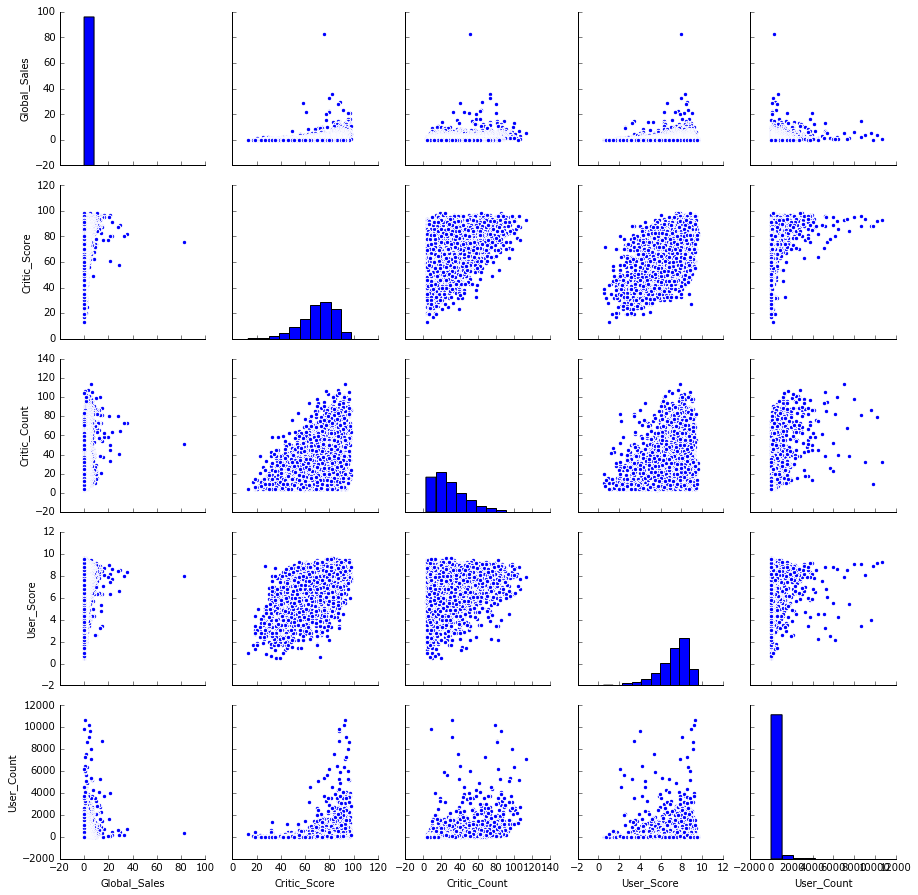

In [8]:
cols = ['Global_Sales','Critic_Score','Critic_Count','User_Score','User_Count']
sns_plot = sns.pairplot(df[cols])

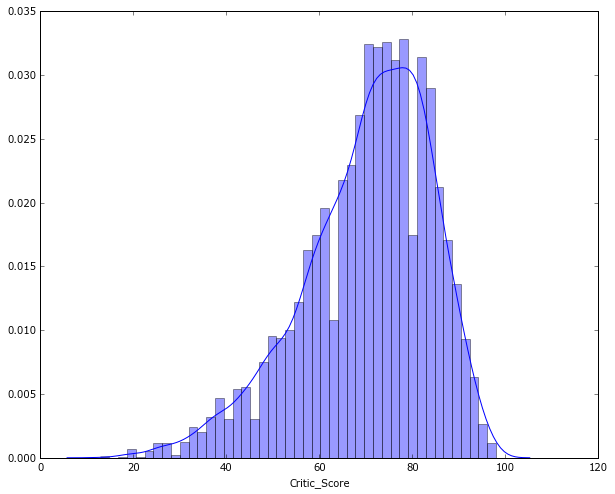

In [9]:
sns.distplot(df.Critic_Score)

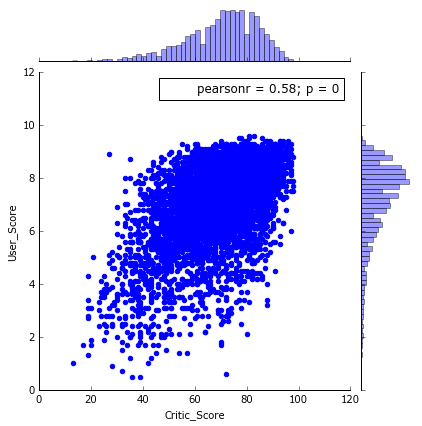

In [10]:
sns.jointplot(df['Critic_Score'],df['User_Score'])

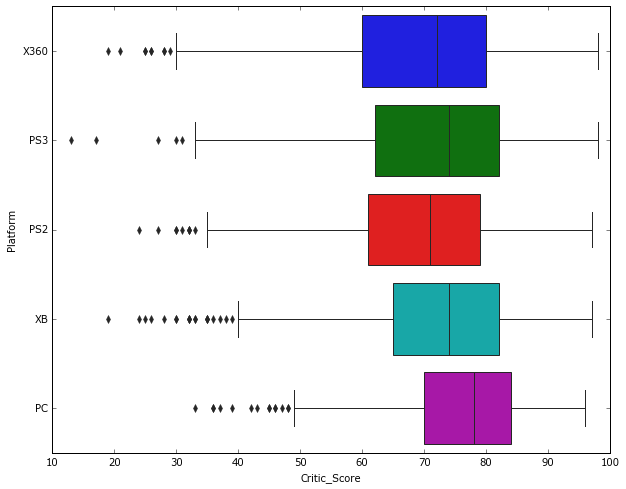

In [11]:
top5platforms = df.Platform.value_counts().head(5).index.values
sns.boxplot(y='Platform',x='Critic_Score',data=df[df.Platform.isin(top5platforms)], orient='h')

In [12]:
platform_genre_sales = df.pivot_table(index='Platform',columns='Genre',values='Global_Sales',aggfunc=sum)\
                            .fillna(0).applymap(float)
platform_genre_sales

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
3DS,30.81,2.00,2.63,4.48,27.61,2.63,13.89,18.94,1.02,16.08,2.20,0.94
DC,0.00,1.33,0.56,0.00,0.12,0.00,0.20,0.68,0.05,0.52,1.09,0.00
DS,42.43,8.83,3.37,68.82,55.02,50.50,29.93,60.31,6.40,42.71,6.01,8.00
GBA,23.21,4.54,3.28,8.59,40.36,5.47,12.60,21.00,1.40,2.03,5.93,3.34
GC,29.99,4.56,15.81,12.72,24.67,3.31,11.09,12.48,13.04,8.39,19.91,3.45
PC,25.45,1.42,0.13,3.02,0.46,0.19,3.18,44.68,36.34,40.34,6.54,25.37
PS,54.93,1.10,18.91,5.66,18.92,0.26,34.17,44.07,5.86,1.67,20.75,0.25
PS2,238.73,10.74,64.72,38.70,52.34,3.97,127.17,77.30,98.20,34.01,191.88,8.21
PS3,262.38,16.18,47.83,26.59,20.91,0.40,62.17,64.00,174.54,7.91,98.20,3.19


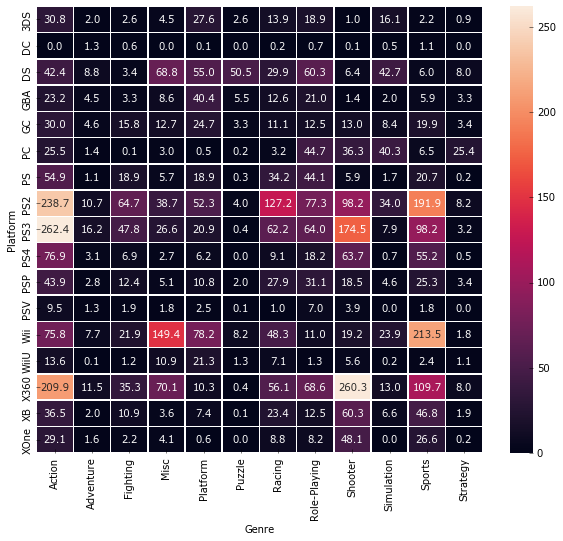

In [13]:
sns.heatmap(platform_genre_sales,annot=True,fmt='.1f',linewidths=.5)

In [14]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [15]:
## посчитаем число вышедших игр и проданных копий по годам
#years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
#    df.groupby('Year_of_Release')[['Name']].count())
#years_df.columns = ['Global_Sales', 'Number_of_Games']
#
## создаем линию для числа проданных копий
#trace0 = go.Scatter(x=years_df.index,y=years_df.Global_Sales,name='Global_Sales')
#
## создаем линию для числа вышедших игр 
#trace1 = go.Scatter(x=years_df.index,y=years_df.Number_of_Games,name='Number of games released')
#
## определяем массив данных и задаем title графика в layout
#data=[trace0,trace1]
#layout = {'title':'Statistics of video games'}
#
## cоздаем объект Figure и визуализируем его
#fig=go.Figure(data=data,layout=layout)
#iplot(fig, show_link=False)

In [16]:
#plotly.offline.plot(fig, filename='years_stat.html', show_link=False)

In [17]:
#platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(df.groupby('Platform')[['Name']].count())
#platforms_df.columns = ['Global_Sales','Number_of_Games']
#platforms_df.sort_values('Global_Sales',ascending=False,inplace=True)
#
#trace0 = go.Bar(x=platforms_df.index,y=platforms_df.Global_Sales,name='Global Sales')
#trace1 = go.Bar(x=platforms_df.index,y=platforms_df.Number_of_Games,name='Number of games released')
#
#data=[trace0,trace1]
#layout={'title':'Share of platforms','xaxis':{'title':'Platform'}}
#fig = go.Figure(data=data,layout=layout)
#
#iplot(fig,show_link=False)

In [18]:
data=[]
for genre in df.Genre.unique():
    data.append(go.Box(y=df[df.Genre==genre].Critic_Score,name=genre))
    
iplot(data,show_link=False)

In [19]:
tdf = pd.read_csv('../../data/telecom_churn.csv')
tdf.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


|Название	|Описание	|Тип
|--|---------------|---------------|
|State	|Буквенный код штата	|категориальный
|Account length	|Как долго клиент обслуживается компанией	|количественный
|Area code	|Префикс номера телефона	|количественный
|International |plan	Международный роуминг (подключен/не подключен)	|бинарный
|Voice mail plan	|Голосовая почта (подключена/не подключена)	|бинарный
|Number vmail messages	|Количество голосовых сообщений	|количественный
|Total day minutes	|Общая длительность разговоров днем	|количественный
|Total day calls	|Общее количество звонков днем	|количественный
|Total day charge	|Общая сумма оплаты за услуги днем	|количественный
|Total eve minutes	|Общая длительность разговоров вечером	|количественный
|Total eve calls	|Общее количество звонков вечером	|количественный
|Total eve charge	|Общая сумма оплаты за услуги вечером	|количественный
|Total night minutes	|Общая длительность разговоров ночью	|количественный
|Total night calls	|Общее количество звонков ночью	|количественный
|Total night charge	|Общая сумма оплаты за услуги ночью	|количественный
|Total intl minutes	|Общая длительность международных разговоров	|количественный
|Total intl calls	|Общее количество международных разговоров	|количественный
|Total intl charge	|Общая сумма оплаты за международные разговоры	|количественный
|Customer service calls	|Число обращений в сервисный центр	|количественный
|Churn 	|Признак оттока, бинарный (1 – потеря клиента, то есть отток)	|бинарный

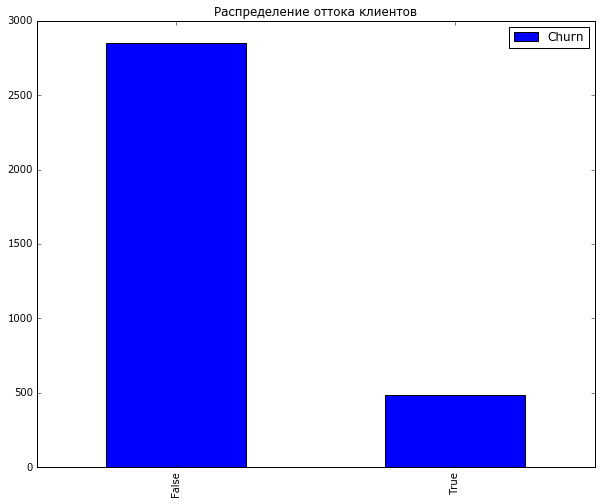

In [20]:
tdf['Churn'].value_counts().plot(kind='bar',label='Churn')
plt.legend()
plt.title('Распределение оттока клиентов')

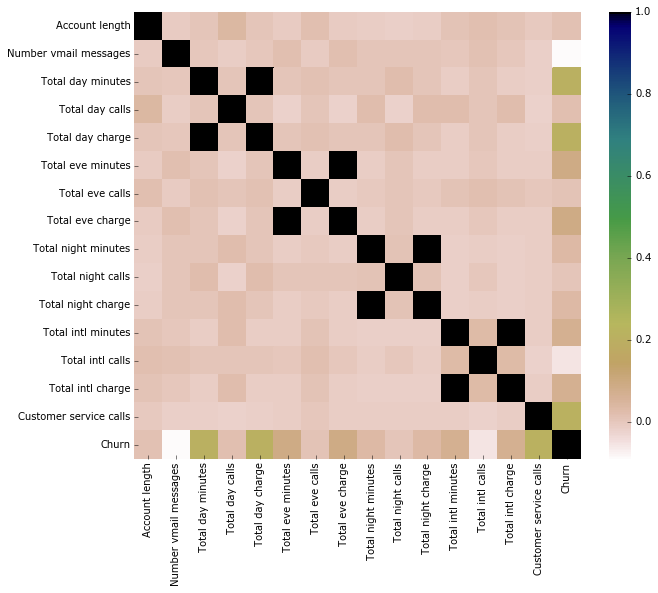

In [29]:
sns.heatmap(tdf.drop(['State', 'International plan', 'Voice mail plan',
                      'Area code'], axis=1).corr(),cmap=pyplot.cm.gist_earth_r)